In [1]:
!nvidia-smi  # check GPU
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)



Wed Dec 31 08:08:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive
drive.mount('/content/drive')

 # << CHANGE THIS PATH


Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/MyDrive/dataset"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
valid_test_gen = ImageDataGenerator(rescale=1/255.0)

train_gen = train_datagen.flow_from_directory(
    f"{dataset_path}/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_gen = valid_test_gen.flow_from_directory(
    f"{dataset_path}/valid",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = valid_test_gen.flow_from_directory(
    f"{dataset_path}/test",
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Found 2100 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 662s 10s/step - accuracy: 0.6218 - loss: 0.6749 - val_accuracy: 0.7317 - val_loss: 0.5367
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 526ms/step - accuracy: 0.7726 - loss: 0.4848 - val_accuracy: 0.7700 - val_loss: 0.4809
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 36s 541ms/step - accuracy: 0.8018 - loss: 0.4284 - val_accuracy: 0.7933 - val_loss: 0.4545
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 37s 555ms/step - accuracy: 0.8200 - loss: 0.4213 - val_accuracy: 0.7967 - val_loss: 0.4510
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 533ms/step - accuracy: 0.8399 - loss: 0.3653 - val_accuracy: 0.8000 - val_loss: 0.4485
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 36s 547ms/step - accuracy: 0.8640 - loss: 0.3369 - val_accuracy: 0.8300 - val_loss: 0.4250
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 37s 558ms/step - accuracy: 0.8632 - loss: 0.3346 - val_accuracy: 0.8483 - val_loss: 0.4043
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 38s 571ms/step - accuracy: 0.8719 - loss: 0.3150 - val_accur

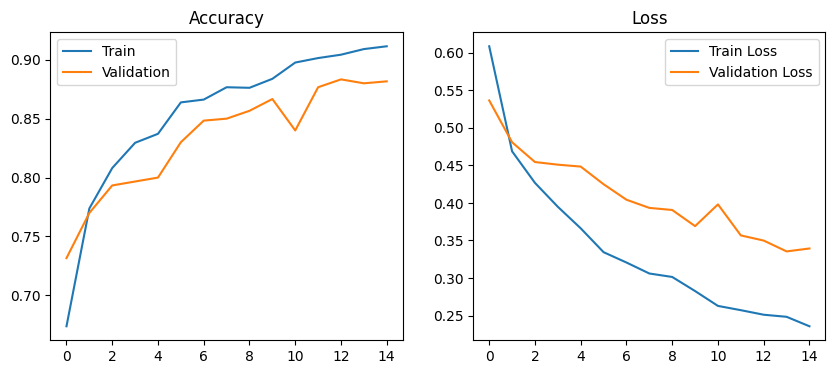

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.legend()
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)


50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 533ms/step - accuracy: 0.6975 - loss: 0.5552
Test Accuracy: 0.8600000143051147


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


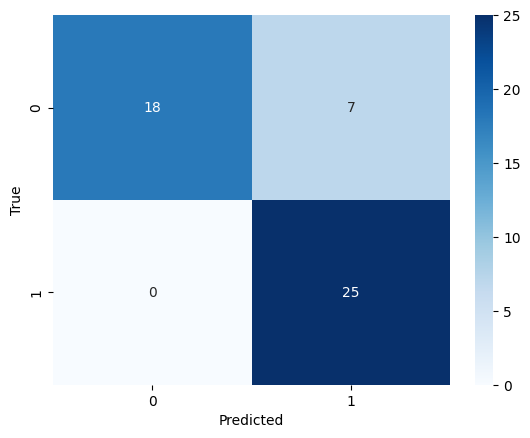

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       0.78      1.00      0.88        25

    accuracy                           0.86        50
   macro avg       0.89      0.86      0.86        50
weighted avg       0.89      0.86      0.86        50



In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

preds = model.predict(test_gen)
pred_labels = (preds > 0.5).astype(int)
true_labels = test_gen.classes

cm = confusion_matrix(true_labels, pred_labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(true_labels, pred_labels))


In [13]:
model.save("Tongue_Diabetes_Classifier.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Tongue_Diabetes_Classifier.tflite","wb").write(tflite_model)


Saved artifact at '/tmp/tmpdn4rdszk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138932362526800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362527376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362530832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362530448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362529296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362531024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362529488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362531600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362531216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138932362529104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1389323625

9520740

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Check class mapping
print(train_generator.class_indices)
# Output example: {'Diabetic': 0, 'Non-Diabetic': 1}

Found 2750 images belonging to 3 classes.
{'test': 0, 'train': 1, 'valid': 2}
